# Tasca: Bases de dades MySQL

In [1]:
### Càrrega de llibreries
import pandas as pd
import mysql.connector

## Exercici 1
__Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python__

<span style='color:blue;font-size:16px'> S'utilitza el diagrama ER de l'exercici anterior per crear la base de dades, afegint valors als diferents atributs de les taules. </span>

In [2]:
# Es crea un objecte que conecta la base de dades de MySQL a Python.
mydb = mysql.connector.connect(
  host="localhost",
  user="qui sap",
  password="no t'ho diré!",
  database="comercio_DB"    
)

print(mydb)

In [3]:
# Aquest objecte permet crear querys, mostrar taules, etc.
mycursor = mydb.cursor()

In [4]:
# Es mostra les taules que formen la base de dades
mycursor.execute("SHOW TABLES")

for x in mycursor:
    print(x)

('client',)
('compra',)
('establiment',)
('producte',)
('te',)
('treballa',)
('treballador',)


## Exercici 2
__Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.__

<span style='color:blue;font-size:18px'> <b> Importació de dades d'una taula a un pandas dataframe </b> </span>

In [5]:
# Registres de l'entitat CLIENT
mycursor.execute("SELECT * FROM client")

client = mycursor.fetchall()

# Nom dels atributs
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creació del dataframe
client_df = pd.DataFrame(client,columns=field_names)
client_df

,DNIclient,Nom,Cognom,Telefon
0,3347538W,Carolina,Solano,699473725
1,34832872L,Carlos,Santos,687345192
2,3484759M,Francisco,Jornada,654839264
3,3899559Q,Andrea,Pérez,683949323
4,4023242K,Luís,Tesada,647382653
5,4189274X,Ginebra,Méndez,694857364
6,4473382S,David,Llull,622938417


In [6]:
# Registres de l'entitat TREBALLADOR
mycursor.execute("SELECT * FROM treballador")

treballador = mycursor.fetchall()

# Nom dels atributs
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creació del dataframe
treballador_df = pd.DataFrame(treballador,columns=field_names)
treballador_df

,DNI,Nom,Cognom,Telefons,Carrec,Sou
0,23283745K,Kevin,Lopez,699384321,Reposador,1130.0
1,31243221R,Dani,Gonzalez,612395843,Transportista,1400.0
2,34273276P,Miguel,Medina,689438321,Reposador,1350.0
3,34832282S,Ana,Martos,694837321,Dependent,1200.0
4,36216721S,Susana,Garcia,695548393,Dependent,1200.0
5,47233232T,Albert,Gonzalez,675823134,Reposador,1300.0
6,83626732W,Mathias,Komstocke,688443932,Encarregat,2500.0


In [7]:
# Registres de l'entitat ESTABLIMENT
mycursor.execute("SELECT * FROM establiment")

establiment = mycursor.fetchall()

# Nom dels atributs
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creació del dataframe
establiment_df = pd.DataFrame(establiment,columns=field_names)
establiment_df

,IDestabliment,Nom,Localitzacio,Superficie
0,1,Saunt Corsega,C/ Corsega 32,1200.0
1,2,Saunt Tamarit,C/ Tamarit 12,930.0
2,3,Saunt Numancia,C/ Numancia 89,1395.0


In [8]:
# Registres de l'entitat PRODUCTE
mycursor.execute("SELECT * FROM producte")

producte = mycursor.fetchall()

# Nom dels atributs
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creació del dataframe
producte_df = pd.DataFrame(producte,columns=field_names)
producte_df

,IDproducte,Nom,Tipus,Preu
0,P1,Pollastre,Aliment,5.40
1,P2,Taronja,Aliment,0.84
2,P3,Tornavis,Eina,2.30
3,P4,Martell,Eina,6.30
4,P5,Llima,Eina,2.40
5,P6,FFVII PS4,Videojoc,45.90
6,P7,SSBU Switch,Videojoc,50.30
7,P8,Respall de dents,Higiene,2.35
8,P9,Gel hidroalcoholic,Higiene,3.80


In [9]:
# Registres de la taula intermitja compra
mycursor.execute("SELECT * FROM compra")

compra = mycursor.fetchall()

# Nom dels atributs
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creació del dataframe
compra_df = pd.DataFrame(compra,columns=field_names)
compra_df

,DNIclient,IDproducte,Data,Import
0,3347538W,P2,22/04/2021,3.36
1,3347538W,P9,22/04/2021,7.60
2,34832872L,P1,23/04/2021,10.80
3,3484759M,P8,23/04/2021,4.70
4,3899559Q,P4,23/04/2021,6.30
5,4023242K,P3,24/04/2021,2.30
6,4023242K,P5,24/04/2021,2.40
7,4023242K,P6,24/04/2021,45.90
8,4189274X,P3,25/04/2021,2.30
9,4473382S,P1,23/04/2021,5.40


In [10]:
# Registres de la taula intermitja compra
mycursor.execute("SELECT * FROM te")

te = mycursor.fetchall()

# Nom dels atributs
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creació del dataframe
te_df = pd.DataFrame(te,columns=field_names)
te_df

,IDestabliment,IDproducte,Stock
0,1,P1,10
1,1,P2,15
2,1,P3,4
3,1,P4,9
4,2,P5,20
5,2,P6,12
6,2,P7,5
7,2,P8,8
8,3,P1,14
9,3,P4,16


<span style='color:blue;font-size:18px'> <b> Llista de clients que han comprat alguna eina </b> </span>

In [11]:
# Registres de l'entitat CLIENT
query_1 = "SELECT client.*, producte.Nom AS nom_eina \
    FROM client \
    INNER JOIN compra ON client.DNIclient = compra.DNIclient \
    INNER JOIN producte ON producte.IDproducte = compra.IDproducte \
    WHERE producte.Tipus = 'Eina'"

mycursor.execute(query_1)

client_eina = mycursor.fetchall()

num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]
field_names

# Creació del dataframe
client_eina_df = pd.DataFrame(client_eina,columns=field_names)
client_eina_df

,DNIclient,Nom,Cognom,Telefon,nom_eina
0,4023242K,Luís,Tesada,647382653,Tornavis
1,4189274X,Ginebra,Méndez,694857364,Tornavis
2,4473382S,David,Llull,622938417,Tornavis
3,3899559Q,Andrea,Pérez,683949323,Martell
4,4023242K,Luís,Tesada,647382653,Llima


<span style='color:blue;font-size:18px'> <b> Sou mig dels treballadors </b> </span>

In [12]:
# Query: sou mig dels treballadors
query1 = """SELECT AVG(sou) AS sou_mig FROM treballador"""

mycursor.execute(query1)

sou_mig = mycursor.fetchall()

for x in sou_mig:
    print('El sou mig és de: ', x)

El sou mig és de:  (1440.0,)


## Exercici 3
__Genera algun gràfic que resumeixi les dades.__

<span style='color:blue;font-size:18px'> <b> Stock total per establiment </b> </span>

In [13]:
# Registres de la taula intermitja compra
query_3 = "SELECT establiment.Nom, sum(te.Stock) AS stock_total \
    FROM establiment \
    INNER JOIN te ON establiment.IDestabliment = te.IDestabliment \
    GROUP BY te.IDestabliment"

mycursor.execute(query_3)

stock_establiment = mycursor.fetchall()

# Nom dels atributs
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creació del dataframe
stock_establiment_df = pd.DataFrame(stock_establiment,columns=field_names)
stock_establiment_df

,Nom,stock_total
0,Saunt Corsega,38
1,Saunt Tamarit,45
2,Saunt Numancia,58


<AxesSubplot:xlabel='Nom'>

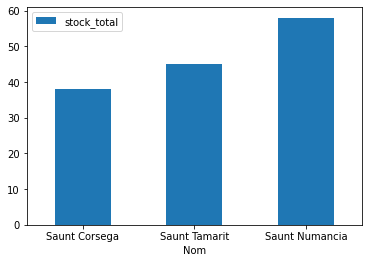

In [14]:
# Gràfic de barres
stock_establiment_df['stock_total'] = stock_establiment_df['stock_total'].astype(int)
stock_establiment_df.plot.bar(x='Nom', y='stock_total', rot=0)